**Importing required libraries**

In [3]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import geocoder

print ('Libraries Imported')

Libraries Imported


**Extract data from csv file**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/88ranji/Coursera_Capstone/master/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**Extracting restaurants list specific to Chennai**

In [5]:
df_india = df[df['Country Code'] == 1]
df_Chen = df_india[df_india['City'] == 'Chennai']
df_Chen.reset_index(drop=True, inplace=True)
df_Chen.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,69024,That Madras Place,1,Chennai,"34/29, 2nd Main Road, Kasturibai Nagar, Adyar,...",Adyar,"Adyar, Chennai",80.250744,13.005801,"European, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,1810
1,72475,Haunted,1,Chennai,"273, F13, New Number 71, 2nd Main Road, Anna N...",Anna Nagar East,"Anna Nagar East, Chennai",80.220672,13.086438,"North Indian, Chinese, Arabian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,3.8,Yellow,Good,519
2,70431,Pantry d'or,1,Chennai,"21/11, J Block, 6th Avenue Main Road, Anna Nag...",Anna Nagar East,"Anna Nagar East, Chennai",80.219104,13.091809,"Continental, Cafe, Italian, Desserts",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.4,Green,Very Good,1504
3,71443,Palmshore,1,Chennai,"95, Jawaharlal Nehru Salai, Jafferkhanpet, Ash...",Ashok Nagar,"Ashok Nagar, Chennai",80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",...,Indian Rupees(Rs.),Yes,Yes,No,No,2,4.2,Green,Very Good,841
4,73088,Chili's,1,Chennai,"49 & 50 L, Express Avenue Mall, White's Road, ...","Express Avenue Mall, Royapettah","Express Avenue Mall, Royapettah, Chennai",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.8,Dark Green,Excellent,1262


In [6]:
df_Chen.shape

(20, 21)

**Cleaning the Data**

In [7]:
df_Rest = df_Chen[df_Chen.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Rest.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,That Madras Place,Adyar,80.250744,13.005801,"European, Italian, Desserts",4.2,Very Good,1810
1,Haunted,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",3.8,Good,519
2,Pantry d'or,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",4.4,Very Good,1504
3,Palmshore,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841
4,Chili's,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262


**Showing clusters on map**

In [9]:
Chennai_Rest = folium.Map(location=[13.08, 80.27], zoom_start=12)

X = df_Rest['Latitude']
Y = df_Rest['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Rest ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Rest['Latitude'], df_Rest['Longitude'], df_Rest['Locality'], df_Rest['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Chennai_Rest)  

Chennai_Rest

### **Analysing the data**

Locations having best Restaurants

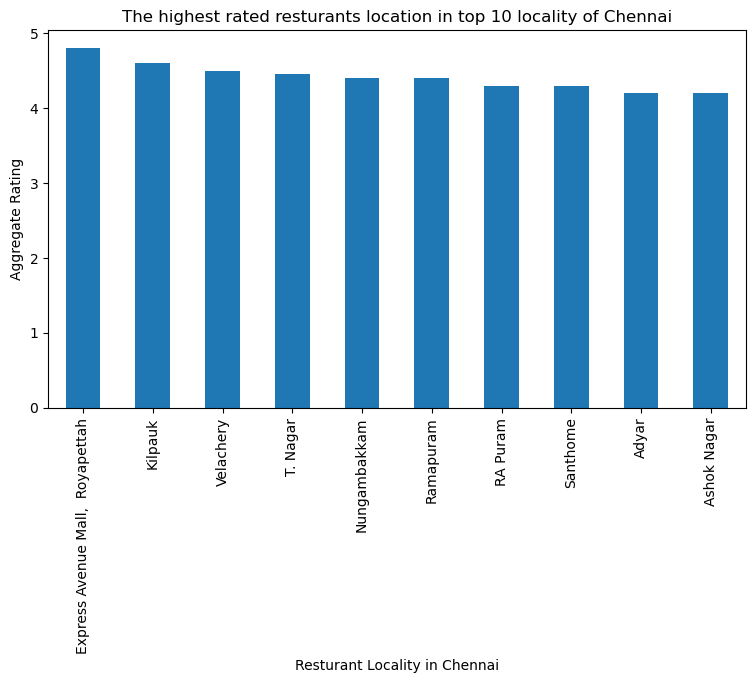

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturants location in top 10 locality of Chennai')

#giving a bar plot
df_Rest.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

Locations having Continental restaurants

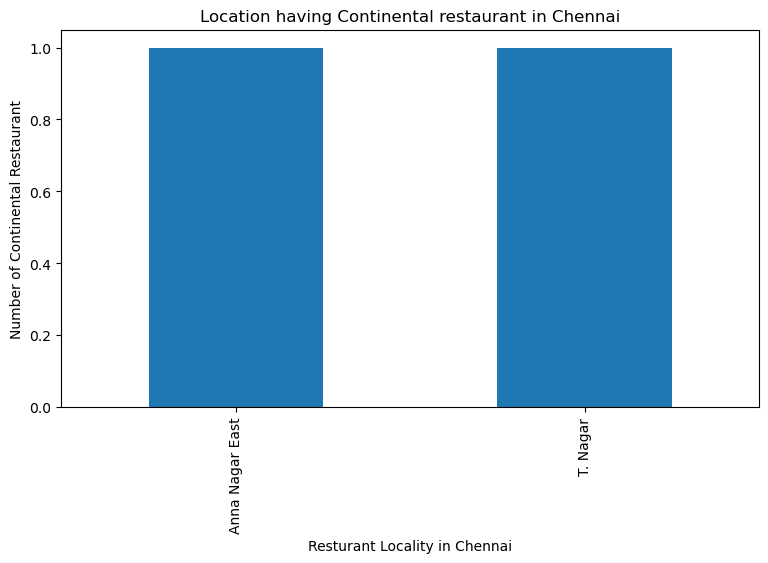

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Location having Continental restaurant in Chennai')

#giving a bar plot
df_Rest[df_Rest['Cuisines'].str.startswith('Continental')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

#On x-axis
plt.xlabel('Resturant Locality in Chennai')
#On y-axis
plt.ylabel('Number of Continental Restaurant')

#displays the plot
plt.show()

### **Using Foursquare to get nearby venues**

In [15]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'URSXTHQVU52KAE3IFKIET34J4DPAF4AO3H0CIZY4TH5XPYF0'
CLIENT_SECRET = 'QRUDUBDJI2ZPUQILAFUH4IRUO2FUFMZ5GKIQZCZT4PUOEOHM'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: URSXTHQVU52KAE3IFKIET34J4DPAF4AO3H0CIZY4TH5XPYF0
CLIENT_SECRET:QRUDUBDJI2ZPUQILAFUH4IRUO2FUFMZ5GKIQZCZT4PUOEOHM


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
Chennai_venues = getNearbyVenues(names=df_Rest['Locality'],
                                   latitudes=df_Rest['Latitude'],
                                   longitudes=df_Rest['Longitude']
                                  )

Adyar
Anna Nagar East
Anna Nagar East
Ashok Nagar
Express Avenue Mall,  Royapettah
Gopalapuram
Kilpauk
Kotturpuram
Mylapore
Nungambakkam
Nungambakkam
Perungudi
RA Puram
Ramapuram
Santhome
T. Nagar
T. Nagar
Velachery
Velachery
Velachery


In [19]:
Chennai_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Adyar,23,23,23,23,23,23
Anna Nagar East,43,43,43,43,43,43
Ashok Nagar,9,9,9,9,9,9
"Express Avenue Mall, Royapettah",43,43,43,43,43,43
Gopalapuram,23,23,23,23,23,23
Kilpauk,12,12,12,12,12,12
Kotturpuram,10,10,10,10,10,10
Mylapore,33,33,33,33,33,33
Nungambakkam,14,14,14,14,14,14


In [20]:
## Analyze Each Locality

# one hot encoding
Chennai_onehot = pd.get_dummies(Chennai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Chennai_onehot['Locality'] = Chennai_venues['Locality'] 

# move Locality column to the first column
column_list = Chennai_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Chennai_onehot = Chennai_onehot[column_list]

Chennai_onehot.head()

,Locality,Accessories Store,American Restaurant,Amphitheater,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,...,Snack Place,South Indian Restaurant,Sports Bar,Sports Club,Steakhouse,Tea Room,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Adyar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
Chennai_grouped = Chennai_onehot.groupby('Locality').mean().reset_index()
Chennai_grouped

,Locality,Accessories Store,American Restaurant,Amphitheater,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,...,Snack Place,South Indian Restaurant,Sports Bar,Sports Club,Steakhouse,Tea Room,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Adyar,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478
1,Anna Nagar East,0.023256,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046512,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000
2,Ashok Nagar,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000
3,"Express Avenue Mall, Royapettah",0.000000,0.023256,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000
4,Gopalapuram,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000
5,Kilpauk,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Kotturpuram,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Mylapore,0.000000,0.000000,0.00000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,...,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000
8,Nungambakkam,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,...,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000
9,Perungudi,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.111111,0.111111,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in Chennai_grouped['Locality']:
    print("----"+hood+"----")
    temp = Chennai_grouped[Chennai_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adyar----
                           venue  freq
0              Indian Restaurant  0.22
1                           Café  0.09
2                   Dessert Shop  0.09
3               Department Store  0.09
4  Vegetarian / Vegan Restaurant  0.04


----Anna Nagar East----
                       venue  freq
0          Indian Restaurant  0.23
1                       Café  0.09
2       Fast Food Restaurant  0.07
3  Middle Eastern Restaurant  0.07
4                 Restaurant  0.05


----Ashok Nagar----
                            venue  freq
0               Indian Restaurant  0.22
1            Fast Food Restaurant  0.22
2                   Movie Theater  0.22
3   Vegetarian / Vegan Restaurant  0.11
4  Multicuisine Indian Restaurant  0.11


----Express Avenue Mall,  Royapettah----
                  venue  freq
0        Clothing Store  0.12
1             Juice Bar  0.07
2  Fast Food Restaurant  0.07
3     Indian Restaurant  0.05
4             Multiplex  0.05


----Gopalapuram----
         

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Chennai_grouped['Locality']

for ind in np.arange(Chennai_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Chennai_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,Indian Restaurant,Café,Dessert Shop,Department Store,Vegetarian / Vegan Restaurant,Pizza Place,North Indian Restaurant,Movie Theater,Italian Restaurant,Ice Cream Shop
1,Anna Nagar East,Indian Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Department Store,Pizza Place
2,Ashok Nagar,Indian Restaurant,Fast Food Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,Bakery,Middle Eastern Restaurant,Office,North Indian Restaurant,Nightclub
3,"Express Avenue Mall, Royapettah",Clothing Store,Juice Bar,Fast Food Restaurant,Indian Restaurant,Multiplex,Hotel,Shopping Mall,Bookstore,Pizza Place,Movie Theater
4,Gopalapuram,Multiplex,Indian Restaurant,Café,Middle Eastern Restaurant,Movie Theater,Bakery,Juice Bar,Gaming Cafe,Clothing Store,Pub
5,Kilpauk,Indian Restaurant,South Indian Restaurant,Italian Restaurant,Hotel,Pizza Place,Multiplex,Fast Food Restaurant,Shoe Store,Middle Eastern Restaurant,Nightclub
6,Kotturpuram,Indian Restaurant,Bakery,Park,Flower Shop,Café,Department Store,South Indian Restaurant,Grocery Store,Convenience Store,Asian Restaurant
7,Mylapore,Indian Restaurant,Hotel,Ice Cream Shop,Concert Hall,Chinese Restaurant,Mexican Restaurant,Gym,Grocery Store,Fruit & Vegetable Store,Electronics Store
8,Nungambakkam,Indian Restaurant,South Indian Restaurant,Kebab Restaurant,Hotel,Gourmet Shop,Middle Eastern Restaurant,Clothing Store,Café,Seafood Restaurant,Shopping Mall
9,Perungudi,Boutique,Indian Restaurant,Donut Shop,Sports Club,South Indian Restaurant,Snack Place,Sandwich Place,Middle Eastern Restaurant,Nightclub,Multiplex


In [26]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Chennai_clustering = Chennai_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Chennai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(15,)

In [29]:
# add clustering labels
Chennai_merged = df_Rest.head(15)
Chennai_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
Chennai_merged = Chennai_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Chennai_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,That Madras Place,Adyar,80.250744,13.005801,"European, Italian, Desserts",4.2,Very Good,1810,3,0,Indian Restaurant,Café,Dessert Shop,Department Store,Vegetarian / Vegan Restaurant,Pizza Place,North Indian Restaurant,Movie Theater,Italian Restaurant,Ice Cream Shop
1,Haunted,Anna Nagar East,80.220672,13.086438,"North Indian, Chinese, Arabian",3.8,Good,519,4,0,Indian Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Department Store,Pizza Place
2,Pantry d'or,Anna Nagar East,80.219104,13.091809,"Continental, Cafe, Italian, Desserts",4.4,Very Good,1504,4,3,Indian Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Department Store,Pizza Place
3,Palmshore,Ashok Nagar,80.208812,13.029780,"North Indian, Mughlai, Chinese, South Indian",4.2,Very Good,841,2,2,Indian Restaurant,Fast Food Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,Bakery,Middle Eastern Restaurant,Office,North Indian Restaurant,Nightclub
4,Chili's,"Express Avenue Mall, Royapettah",80.264151,13.058616,"Mexican, American, Tex-Mex, Burger",4.8,Excellent,1262,1,2,Clothing Store,Juice Bar,Fast Food Restaurant,Indian Restaurant,Multiplex,Hotel,Shopping Mall,Bookstore,Pizza Place,Movie Theater


### **Create Final Map**

In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Chennai_merged['Latitude'], Chennai_merged['Longitude'], Chennai_merged['Locality'], Chennai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine Clusters**

In [31]:
## Cluster 1
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 0, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Locality,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adyar,4.2,Very Good,1810,3,0,Indian Restaurant,Café,Dessert Shop,Department Store,Vegetarian / Vegan Restaurant,Pizza Place,North Indian Restaurant,Movie Theater,Italian Restaurant,Ice Cream Shop
1,Anna Nagar East,3.8,Good,519,4,0,Indian Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Department Store,Pizza Place
6,Kilpauk,4.6,Excellent,1510,4,0,Indian Restaurant,South Indian Restaurant,Italian Restaurant,Hotel,Pizza Place,Multiplex,Fast Food Restaurant,Shoe Store,Middle Eastern Restaurant,Nightclub
7,Kotturpuram,4.1,Very Good,1004,3,0,Indian Restaurant,Bakery,Park,Flower Shop,Café,Department Store,South Indian Restaurant,Grocery Store,Convenience Store,Asian Restaurant
10,Nungambakkam,4.2,Very Good,1714,1,0,Indian Restaurant,South Indian Restaurant,Kebab Restaurant,Hotel,Gourmet Shop,Middle Eastern Restaurant,Clothing Store,Café,Seafood Restaurant,Shopping Mall
11,Perungudi,3.8,Good,1317,0,0,Boutique,Indian Restaurant,Donut Shop,Sports Club,South Indian Restaurant,Snack Place,Sandwich Place,Middle Eastern Restaurant,Nightclub,Multiplex
12,RA Puram,4.3,Very Good,1607,3,0,Restaurant,Indian Restaurant,Dessert Shop,Chinese Restaurant,Camera Store,Italian Restaurant,Ice Cream Shop,Hotel,Nightclub,Department Store
13,Ramapuram,4.4,Very Good,645,2,0,Italian Restaurant,Indian Restaurant,Café,Vegetarian / Vegan Restaurant,Andhra Restaurant,Office,Asian Restaurant,Bakery,Restaurant,Sandwich Place
14,Santhome,4.3,Very Good,742,3,0,Indian Restaurant,BBQ Joint,Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Lounge,Kebab Restaurant,Office


In [32]:
## Cluster 2
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 1, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Locality,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Nungambakkam,4.6,Excellent,1753,1,1,Indian Restaurant,South Indian Restaurant,Kebab Restaurant,Hotel,Gourmet Shop,Middle Eastern Restaurant,Clothing Store,Café,Seafood Restaurant,Shopping Mall


In [33]:
## Cluster 3
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 2, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Locality,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Ashok Nagar,4.2,Very Good,841,2,2,Indian Restaurant,Fast Food Restaurant,Movie Theater,Vegetarian / Vegan Restaurant,Multicuisine Indian Restaurant,Bakery,Middle Eastern Restaurant,Office,North Indian Restaurant,Nightclub
4,"Express Avenue Mall, Royapettah",4.8,Excellent,1262,1,2,Clothing Store,Juice Bar,Fast Food Restaurant,Indian Restaurant,Multiplex,Hotel,Shopping Mall,Bookstore,Pizza Place,Movie Theater
8,Mylapore,4.0,Very Good,1820,1,2,Indian Restaurant,Hotel,Ice Cream Shop,Concert Hall,Chinese Restaurant,Mexican Restaurant,Gym,Grocery Store,Fruit & Vegetable Store,Electronics Store


In [34]:
## Cluster 4
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 3, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Locality,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Anna Nagar East,4.4,Very Good,1504,4,3,Indian Restaurant,Café,Fast Food Restaurant,Middle Eastern Restaurant,Restaurant,Bakery,Chinese Restaurant,Ice Cream Shop,Department Store,Pizza Place


In [35]:
## Cluster 5
Chennai_merged.loc[Chennai_merged['Cluster Labels'] == 4, Chennai_merged.columns[[1] + list(range(5, Chennai_merged.shape[1]))]]

,Locality,Aggregate rating,Rating text,Votes,Cluster,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Gopalapuram,4.2,Very Good,191,1,4,Multiplex,Indian Restaurant,Café,Middle Eastern Restaurant,Movie Theater,Bakery,Juice Bar,Gaming Cafe,Clothing Store,Pub


In [36]:
print ('Capstone Project concluded')

Capstone Project concluded
